In [1]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import sklearn
import os
from sklearn.decomposition import PCA
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [3]:
nose_pts = np.array([  1,   2,   3,   4,   5,   6,  19,  20,  44,  45,  48,  49,  51,
        59,  60,  64,  75,  79,  94,  97,  98,  99, 102, 114, 115, 122,
       125, 128, 129, 131, 134, 141, 166, 168, 174, 188, 193, 195, 196,
       197, 198, 203, 217, 218, 219, 220, 235, 236, 237, 238, 239, 240,
       241, 242, 244, 245, 248, 250, 274, 275, 278, 279, 281, 289, 290,
       294, 305, 309, 326, 327, 328, 331, 343, 344, 351, 354, 357, 358,
       360, 363, 370, 392, 399, 412, 417, 419, 420, 423, 437, 438, 439,
       440, 455, 456, 457, 458, 459, 460, 461, 462, 464, 465])
not_nose_pts = np.setdiff1d(np.arange(478),nose_pts)


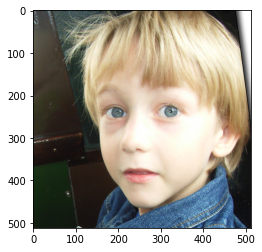

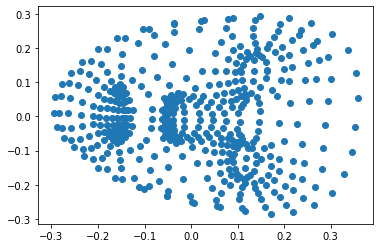

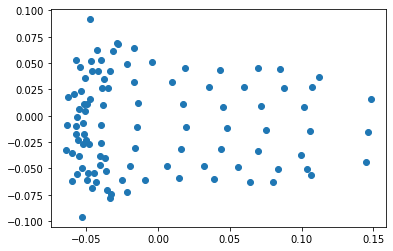

CeterisParibusDataset/0_0_0_0_0_1_1_0_0.png [0.51033579 0.3846123  0.10505191] [0.3096069  0.17303689 0.5173562 ]


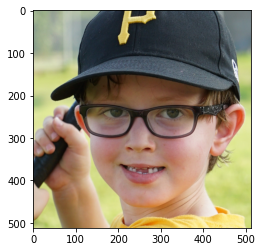

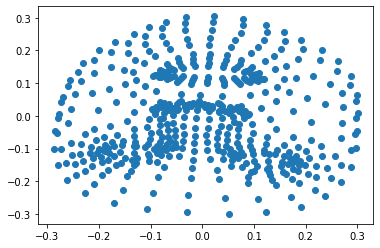

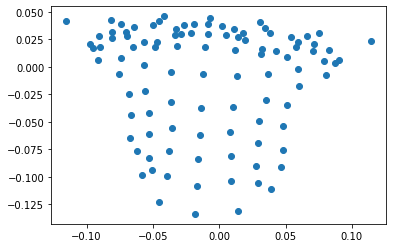

CeterisParibusDataset/0_0_0_0_1_0_2_0_0.png [0.45001554 0.42248869 0.12749577] [0.2095387 0.1888427 0.6016186]


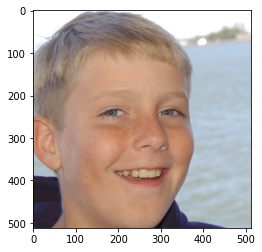

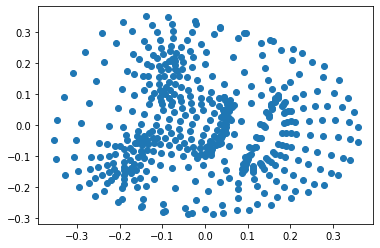

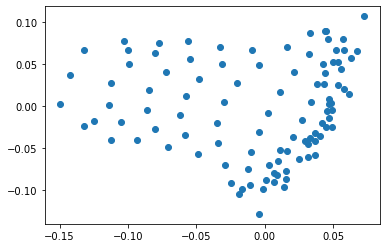

CeterisParibusDataset/0_0_0_1_0_0_1_0_0.png [0.46293702 0.4131561  0.12390688] [0.20675152 0.19726319 0.59598529]


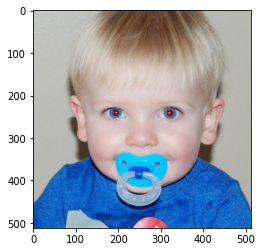

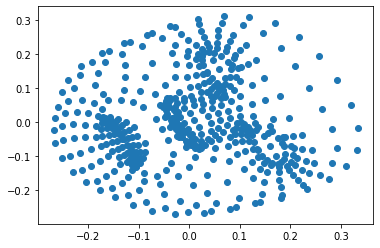

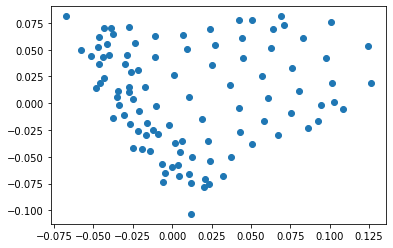

CeterisParibusDataset/0_0_0_1_1_1_1_0_0.png [0.45243146 0.43413054 0.113438  ] [0.22735799 0.21475433 0.55788768]


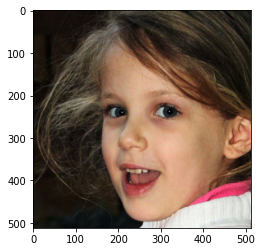

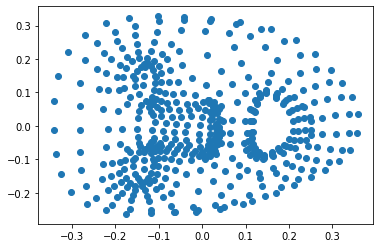

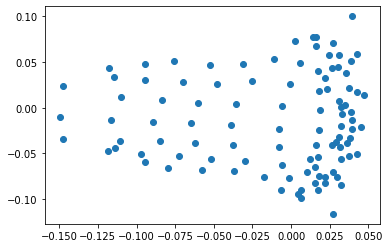

CeterisParibusDataset/0_0_1_0_0_0_2_0_0.png [0.49911038 0.38508496 0.11580467] [0.21894275 0.18996125 0.591096  ]


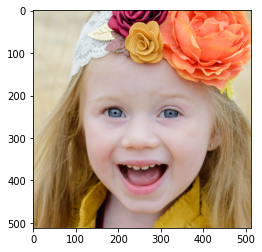

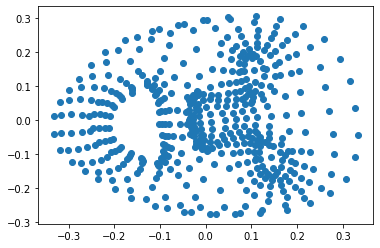

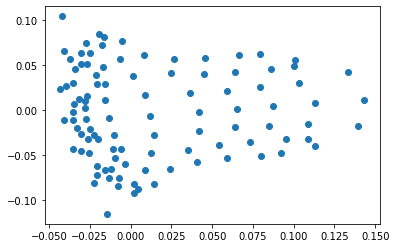

CeterisParibusDataset/0_0_1_0_1_0_1_0_0.png [0.4675176  0.41960618 0.11287623] [0.20242156 0.18243203 0.61514641]


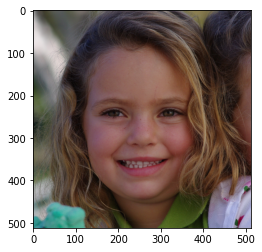

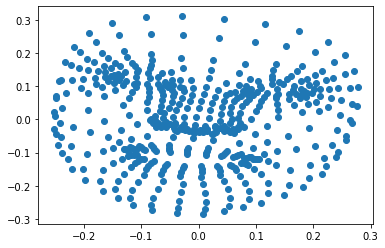

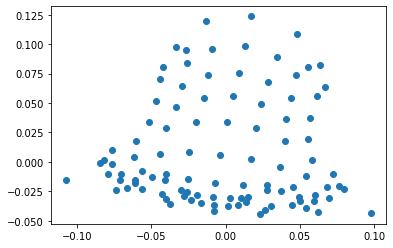

CeterisParibusDataset/0_0_1_1_0_0_2_1_1.png [0.44679668 0.42838866 0.12481465] [0.19748849 0.19168152 0.61082999]


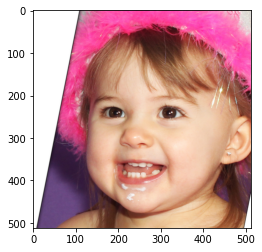

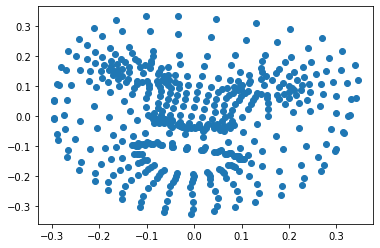

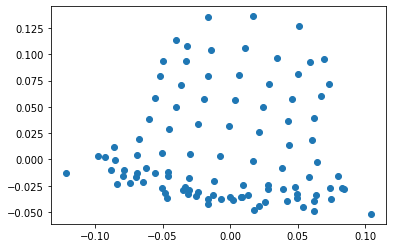

CeterisParibusDataset/0_0_1_1_1_1_2_0_0.png [0.44736387 0.43294918 0.11968695] [0.19593605 0.19120674 0.61285721]


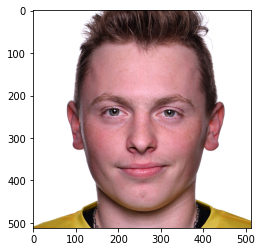

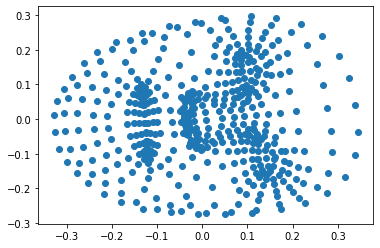

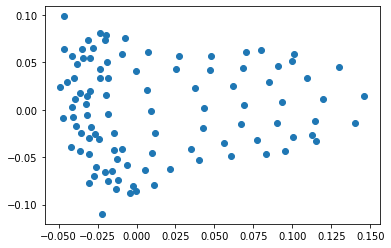

CeterisParibusDataset/0_1_0_0_0_0_2_0_0.png [0.46635257 0.41598749 0.11765995] [0.24240046 0.19210394 0.56549559]


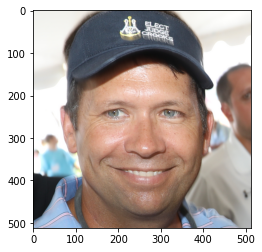

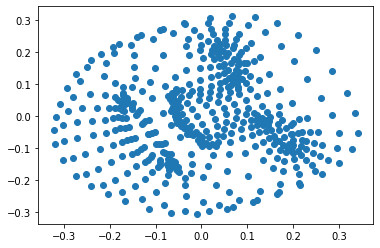

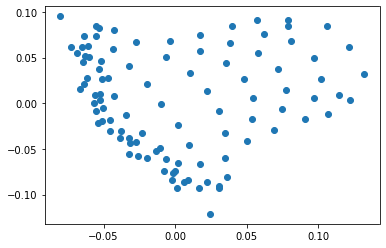

CeterisParibusDataset/0_1_0_0_1_0_0_0_0.png [0.45146989 0.43171222 0.11681789] [0.21529213 0.2164773  0.56823057]


In [7]:
foldername = "CeterisParibusDataset"
IMAGE_FILES = [foldername+'/'+filename for filename in os.listdir(foldername) if 'png' in filename]

face_mesh =  mp_face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5)

for filename in IMAGE_FILES[:10]:
    print('='*50)
    image = cv2.imread(filename)
    plt.imshow(image[:,:,::-1])
    plt.show()
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    face_landmarks = results.multi_face_landmarks[0]
    data = []
    for pt in face_landmarks.landmark:
        data.append([pt.x, pt.y, pt.z])
    data = np.array(data)
    
    pca = PCA(n_components=3)
    pca.fit(data)
    trans_data = pca.transform(data)
    plt.scatter(trans_data[:,0], trans_data[:,1])
    plt.show()

    nose_data = data[nose_pts]
    trans_nose_data = pca.transform(nose_data)
    plt.scatter(trans_nose_data[:,0], trans_nose_data[:,1])
    plt.show()


    result = np.zeros(pca.n_components)
    for ii in range(pca.n_components):
        X_trans_ii = np.zeros_like(trans_nose_data)
        X_trans_ii[:, ii] = trans_nose_data[:, ii]
        X_approx_ii = pca.inverse_transform(X_trans_ii)

        result[ii] = 1 - (np.linalg.norm(X_approx_ii - nose_data) /
                          np.linalg.norm(nose_data - pca.mean_)) ** 2


    print(filename, pca.explained_variance_ratio_, result)
    # std_trans = np.std(trans_data, axis=0)
    # std_trans_nose = np.std(trans_nose_data, axis=0)
    # print( result[-1]/pca.explained_variance_ratio_[-1] )

    # pcs = pca.components_
    # for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    #     # Afficher un segment de l'origine au point (x, y)
    #     plt.plot([0, x], [0, y], color='k')
    #     # Afficher le nom (data.columns[i]) de la performance
    #     plt.text(x, y,  str(i), fontsize='14')

    # # Afficher une ligne horizontale y=0
    # plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
    # Afficher une ligne verticale x=0
    # plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')
    # plt.show()
    




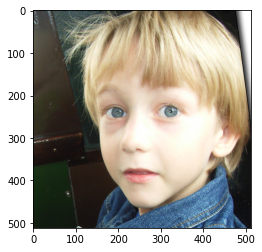

4.924767030022783


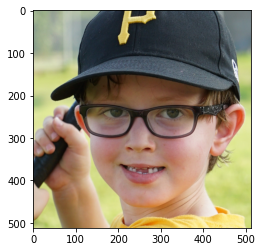

4.718733763258129


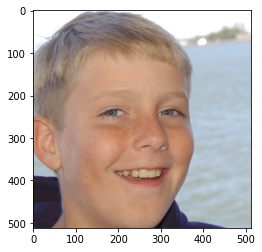

4.80994529221116


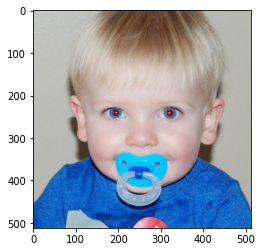

4.9179962925438705


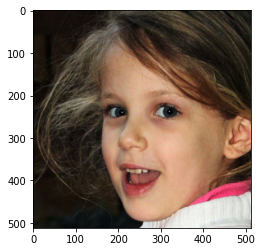

5.104250306250763


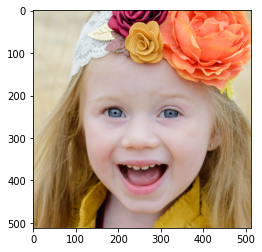

5.449742922708791


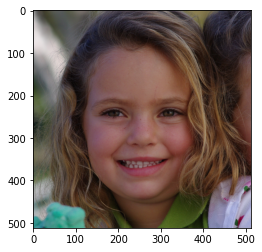

4.893896455318826


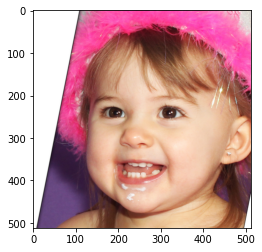

5.120501494569031


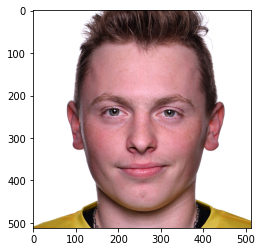

4.806186047407798


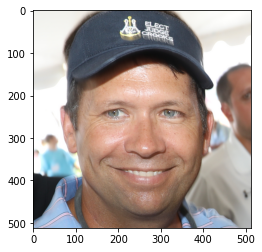

4.864242673228964


In [8]:
foldername = "CeterisParibusDataset"
IMAGE_FILES = [foldername+'/'+filename for filename in os.listdir(foldername) if 'png' in filename]

face_mesh =  mp_face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5)

for filename in IMAGE_FILES[:10]:
    print('='*50)
    image = cv2.imread(filename)
    plt.imshow(image[:,:,::-1])
    plt.show()
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    face_landmarks = results.multi_face_landmarks[0]
    data = []
    for pt in face_landmarks.landmark:
        data.append([pt.x, pt.y, pt.z])
    data = np.array(data)
    
    pca = PCA(n_components=3)
    pca.fit(data)
    trans_data = pca.transform(data)
    # plt.scatter(trans_data[:,0], trans_data[:,1])
    # plt.show()

    nose_data = data[nose_pts]
    trans_nose_data = pca.transform(nose_data)
    # plt.scatter(trans_nose_data[:,0], trans_nose_data[:,1])
    # plt.show()


    result = np.zeros(pca.n_components)
    for ii in range(pca.n_components):
        X_trans_ii = np.zeros_like(trans_nose_data)
        X_trans_ii[:, ii] = trans_nose_data[:, ii]
        X_approx_ii = pca.inverse_transform(X_trans_ii)

        result[ii] = 1 - (np.linalg.norm(X_approx_ii - nose_data) /
                          np.linalg.norm(nose_data - pca.mean_)) ** 2


    # print(filename, pca.explained_variance_ratio_, result)
    print(result[-1]/pca.explained_variance_ratio_[-1])
